In [ ]:
#Links to online resources I used:
#https://stackoverflow.com/questions/2677185/how-can-i-read-a-functions-signature-including-default-argument-values
#https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
#https://stackoverflow.com/questions/17734618/dynamic-method-call-in-python-2-7-using-strings-of-method-names
#https://stackoverflow.com/questions/70201088/python-dictionary-remove-pairs-when-key-not-matching-reference-list
#https://stackoverflow.com/questions/3420122/filter-dict-to-contain-only-certain-keys
#https://docs.python.org/3/library/inspect.html#inspect.signature
#https://www.javatpoint.com/ipython-display
#https://stackoverflow.com/questions/15065833/imbalance-in-scikit-learn
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#https://github.com/scikit-learn-contrib/imbalanced-learn
#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c
#https://cloud.githubusercontent.com/assets/12300013/13094598/935bf170-d4c0-11e5-8b27-7f635c59df08.png
#https://stackoverflow.com/questions/62230507/multiple-columns-for-hue-parameter-in-seaborn-violinplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import inspect

df = pd.read_csv("https://raw.githubusercontent.com/Nhorsey/MANE-4962_Project/main/Dataset/ai4i2020.csv")

In [ ]:
smote = True


public_failure_modes = {
      'Machine failure' : df['Machine failure'],
      'PWF'             : df['PWF'],
      'TWF'             : df['TWF'],
      'HDF'             : df['HDF'],
      'OSF'             : df['OSF']#,
      #'RNF'             : df['RNF'],
  }

public_metrics = {
      'AUC_ROC'   : metrics.roc_auc_score,
      'accuracy'  : metrics.accuracy_score,
      'recall'    : metrics.recall_score,
      'precision' : metrics.precision_score,
      'avg_precision': metrics.average_precision_score,
      'f1': metrics.f1_score

  }

def WrangleData(X, y):
  X_scaler = StandardScaler()
  y_scaler = StandardScaler()
  X_scaler.fit(X)
  X_scaled = X_scaler.transform(X)
  #y_scaled = y.mask(y == 0, -1)
  y_scaled = y
  X_train, X_test, y_train, y_test=train_test_split(
      X_scaled,y_scaled,
      test_size=0.30,
      train_size=0.70,
      random_state=123,
      shuffle=True,
      stratify=y_scaled)
  if smote:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
  else:
    X_res, y_res = X_train, y_train
  return X_res, X_test, y_res, y_test

def LogRegressor(X_train, X_test, y_train, y_test):
  log_regressor = LogisticRegression()
  log_regressor.fit(X_train,y_train.ravel())
  y_pred = log_regressor.predict(X_test)
  return "LogReg", y_test, y_pred

def SVMClassifier(X_train, X_test, y_train, y_test):
  svm_clf = svm.SVC()
  svm_clf.fit(X_train, y_train.ravel())
  y_pred = svm_clf.predict(X_test)
  return "SVM", y_test, y_pred

def KNNClassifier(X_train, X_test, y_train, y_test):
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  knn_clf.fit(X_train,y_train.ravel())
  y_pred = knn_clf.predict(X_test)
  return "KNN", y_test, y_pred

def RFClassifier(X_train, X_test, y_train, y_test, importances=False):
  rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini' )
  rf_clf.fit(X_train, y_train.ravel())
  y_pred = rf_clf.predict(X_test)
  if importances: return rf_clf.feature_importances_
  return "RF", y_test, y_pred

def DTClassifier(X_train, X_test, y_train, y_test):
  dt_clf = DecisionTreeClassifier()
  dt_clf.fit(X_train, y_train.ravel())
  y_pred = dt_clf.predict(X_test)
  return "DT", y_test, y_pred


def GradBoostClassifier(X_train, X_test, y_train, y_test):
  gradboost_clf = GradientBoostingClassifier()
  gradboost_clf.fit(X_train, y_train.ravel())
  y_pred = gradboost_clf.predict(X_test)
  return "GradBoost", y_test, y_pred

def AdaBoostClassifierH(X_train, X_test, y_train, y_test):
  adaboost_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=10, criterion='gini' ), n_estimators=50)
  adaboost_clf.fit(X_train, y_train.ravel())
  y_pred = adaboost_clf.predict(X_test)
  return "AdaBoost", y_test, y_pred

def ExtraTreesClassifierH(X_train, X_test, y_train, y_test):
  extratrees_clf = ExtraTreesClassifier()
  #extratrees_clf = ExtraTreesClassifier(n_estimators=10, criterion='gini' )
  extratrees_clf.fit(X_train, y_train.ravel())
  y_pred = extratrees_clf.predict(X_test)
  return "ExtraTrees", y_test, y_pred

def BaggingClassifierH(X_train, X_test, y_train, y_test):
  bagging_clf = BaggingClassifier()
  bagging_clf.fit(X_train, y_train.ravel())
  y_pred = bagging_clf.predict(X_test)
  return "Bagging", y_test, y_pred

public_models = {
      'LogReg'    : LogRegressor,
      'SVM'       : SVMClassifier,
      'KNN'       : KNNClassifier,
      'RF'        : RFClassifier,
      'DT'        : DTClassifier,
      'GradBoost' : GradBoostClassifier,
      'AdaBoost'  : AdaBoostClassifierH,
      'ExtraTrees': ExtraTreesClassifierH,
      'Bagging'   : BaggingClassifierH
  }


def GetMetrics(name, y_test, y_pred):
  '''
  Calculates performance metrics for a model.

  Args:
    name    (string)         : name of model.
    y_test  (pandas.Series)  : true values.
    y_pred  (pandas.Series)  : predicted values.

  Returns:
    results (list)           : list of performance metrics.
  '''

  results = [name]                                                              # initialize results list, starting with name, which is the model name ('LogReg', 'SVM', 'KNN', etc)
  for metric in public_metrics:                                                 # iterate through all metrics
    if 'zero_division' in inspect.signature(public_metrics[metric]).parameters: # check to see if the metric has a zero-division parameter
      results.append(public_metrics[metric](y_test, y_pred, zero_division = 0)) # set output to zero when zero-division occurs
    else: results.append(public_metrics[metric](y_test, y_pred))
  return results

def TestModels(X, df, usr_fails = None, usr_mods = None):
  '''
  Tests all models in 'public_models' and all failure modes in 'public_failure_modes'.

  Args:
    X           (pandas.DataFrame)  : features.
    df          (pandas.DataFrame)  : dataframe of all features and targets.
    usr_fails   (dict, optional)    : dict of user defined failure modes.
    usr_mods    (dict, optional)    : dict of user defined models.

  Returns:
    test_df     (pandas.DataFrame)  : Pandas dataframe containing results of performance metrics.
  '''

  columns = ['Failure Mode','Method'] + list(public_metrics.keys())             # column names for output table
  mods = public_models
  fails = public_failure_modes

  if usr_fails is not None: fails = {key: fails[key] for key in usr_fails}      # If user has specified failure modes, then only use those
  if usr_mods  is not None: mods  = {key: mods[key]  for key in usr_mods}       # If user has specified models, then only use those
  test_df = pd.DataFrame(columns=columns)
  df_list = []
  for fail in fails:                                                            # iterate through all failure modes
    results_list = []
    for mod in mods:                                                            # iterate through all models
      results_list.append([fail] +
                          GetMetrics(*mods[mod](*WrangleData(X, fails[fail])))) # append result from 'GetMetrics' of model 'mod' in 'models' to 'results_list'
    df_list.append(pd.DataFrame(results_list))#, columns=columns))
    test_df = pd.concat([test_df, pd.DataFrame(results_list, columns=columns)], ignore_index=True)  #keys=['s1', 's2'], names=["group_key"])#, columns=columns)])#, axis=0)
  return test_df

def make_confusion_matrix(X, df, fail, model, title):
  mods = public_models
  fails = public_failure_modes
  model_name, y_test, y_pred = mods[model](*WrangleData(X, fails[fail]))
  cm = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cm,linewidths=2,fmt=".0f", annot=True, cmap='viridis', cbar=False, square=True);
  ax.set_xticklabels(['No Failure','Failure']);
  ax.set_yticklabels(['No Failure', 'Failure']);
  plt.xlabel('Predicted');
  plt.ylabel('Actual');
  plt.title(title, fontsize='medium', fontweight='bold');

In [ ]:
# @title
X = df[df.columns[3:8]]
#results = TestModels(X, df, usr_fails = ['HDF'], usr_mods=['LogReg','SVM'])
#results = TestModels(X, df)
#print(len(results))
#results[0]
#results
#TODO maybe change to do "WrangleData" just once so that it is consistent across all trials! - No lol

In [ ]:

#results = TestModels(X, df, usr_fails = ['Machine failure'], usr_mods=['GradBoost'])
results = TestModels(X, df)
results



,Failure Mode,Method,AUC_ROC,accuracy,recall,precision,avg_precision,f1
0,Machine failure,LogReg,0.818871,0.823667,0.813725,0.139966,0.120227,0.238849
1,Machine failure,SVM,0.912577,0.913333,0.911765,0.270349,0.249495,0.417040
2,Machine failure,KNN,0.852261,0.943000,0.754902,0.345291,0.268995,0.473846
3,Machine failure,RF,0.875868,0.970333,0.774510,0.544828,0.429641,0.639676
4,Machine failure,DT,0.835272,0.965000,0.696078,0.489655,0.351172,0.574899
5,Machine failure,GradBoost,0.919407,0.935667,0.901961,0.334545,0.305080,0.488064
6,Machine failure,AdaBoost,0.871828,0.971667,0.764706,0.561151,0.437116,0.647303
7,Machine failure,ExtraTrees,0.853256,0.972333,0.725490,0.573643,0.425506,0.640693
8,Machine failure,Bagging,0.866064,0.969667,0.754902,0.538462,0.414819,0.628571
9,PWF,LogReg,0.992934,0.986000,1.000000,0.400000,0.400000,0.571429


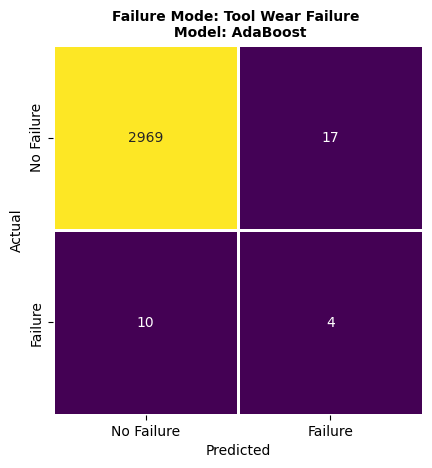

In [ ]:
title = 'Failure Mode: Tool Wear Failure \n Model: AdaBoost'
make_confusion_matrix(X, df, 'TWF', 'AdaBoost', title)


[None, None, None, None, None, None, None, None, None, None]

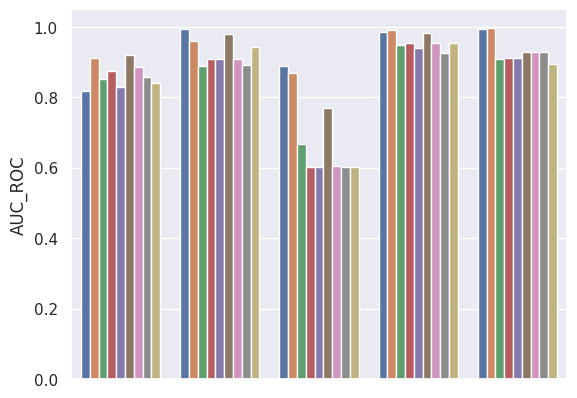

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='AUC_ROC',hue='Method', data=results, legend=False)
g.set(xticklabels=[])
plt.ylim(0, 1.05)
g.set(xlabel=None)
plt.setp(g.get_xticklabels(), rotation=60)

[None, None, None, None, None, None, None, None, None, None]

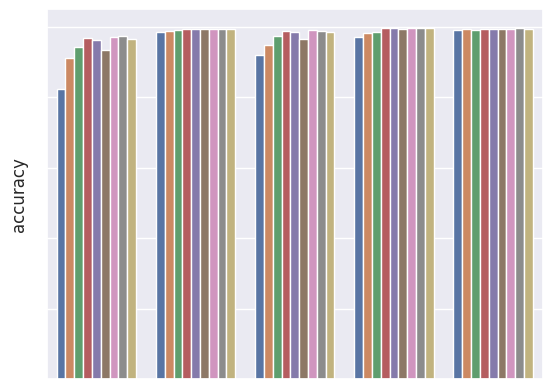

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='accuracy',hue='Method', data=results, legend=False)
g.set(xticklabels=[])
plt.ylim(0, 1.05)
g.set(xlabel=None)
g.set(yticklabels=[])
plt.setp(g.get_xticklabels(), rotation=60)

[None, None, None, None, None, None, None, None, None, None]

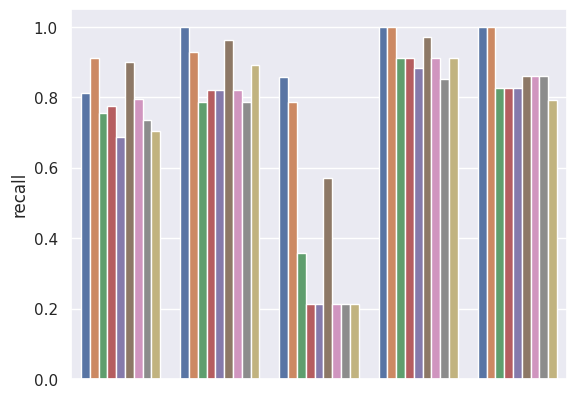

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='recall',hue='Method', data=results, legend=False)
g.set(xticklabels=[])
plt.ylim(0, 1.05)
g.set(xlabel=None)
plt.setp(g.get_xticklabels(), rotation=60)

[None, None, None, None, None, None, None, None, None, None]

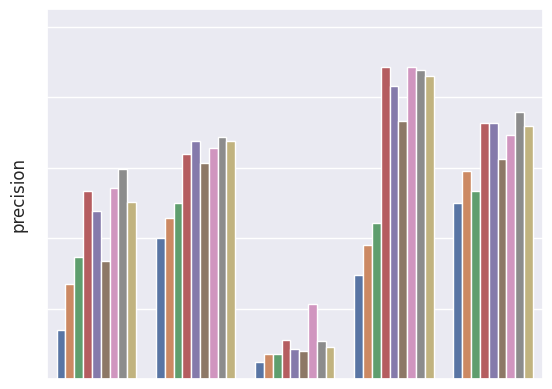

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='precision',hue='Method', data=results, legend=False)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.ylim(0, 1.05)
g.set(xlabel=None)
plt.setp(g.get_xticklabels(), rotation=60)

[None, None, None, None, None, None, None, None, None, None]

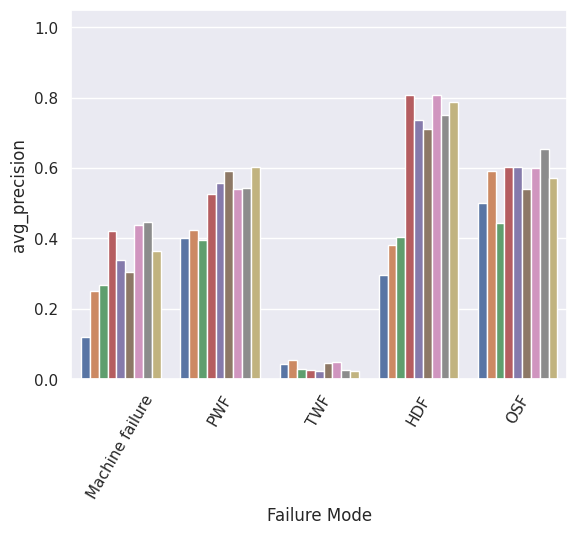

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='avg_precision',hue='Method', data=results, legend=False)
plt.ylim(0, 1.05)
plt.setp(g.get_xticklabels(), rotation=60)

[None, None, None, None, None, None, None, None, None, None]

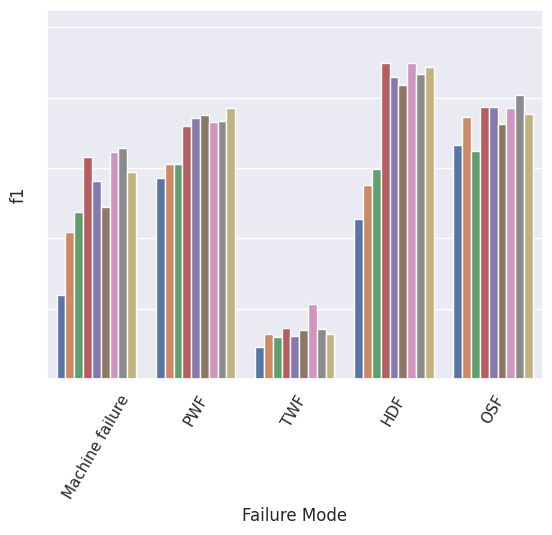

In [ ]:
# @title
sns.set(font_scale=1.0)
g = sns.barplot(x='Failure Mode', y='f1',hue='Method', data=results, legend=False)
g.set(yticklabels=[])
plt.ylim(0, 1.05)
plt.setp(g.get_xticklabels(), rotation=60)
#plt.legend(loc="lower center", ncol=9, draggable=True, bbox_to_anchor=(0.5, -0.15), bbox_transform=plt.gcf().transFigure)


[None,
 None,
 None,
 None,
 None,
 None,
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

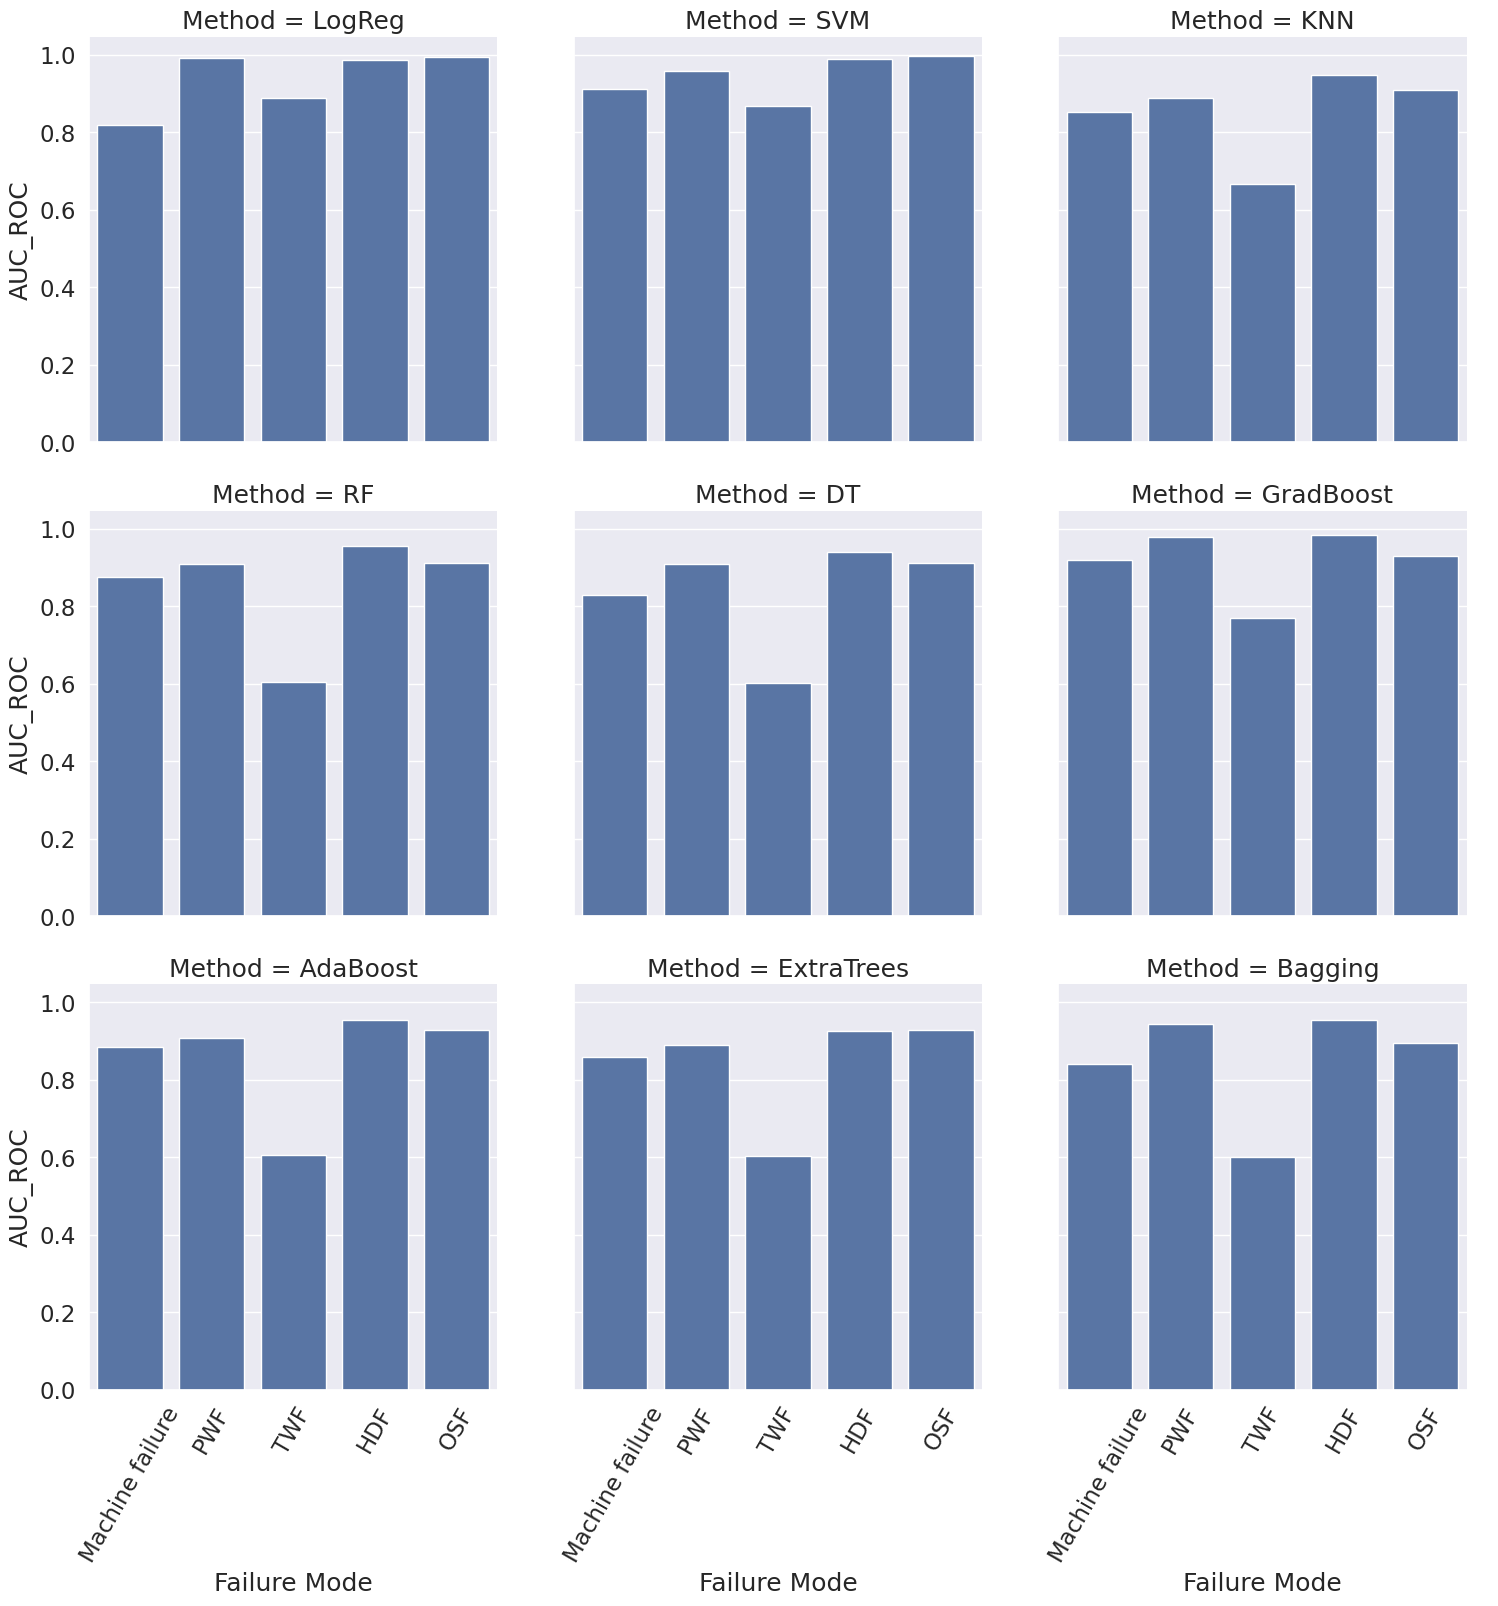

In [ ]:
sns.set(font_scale=1.5)
#g = sns.catplot(x='Failure Mode', col= 'Method', y=results[['AUC_ROC', 'accuracy']].apply(tuple, axis=1), kind='bar', data=results, col_wrap=3)
g = sns.catplot(x='Failure Mode', col= 'Method', y='AUC_ROC', kind='bar', data=results, col_wrap=3)
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]

[None,
 None,
 None,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

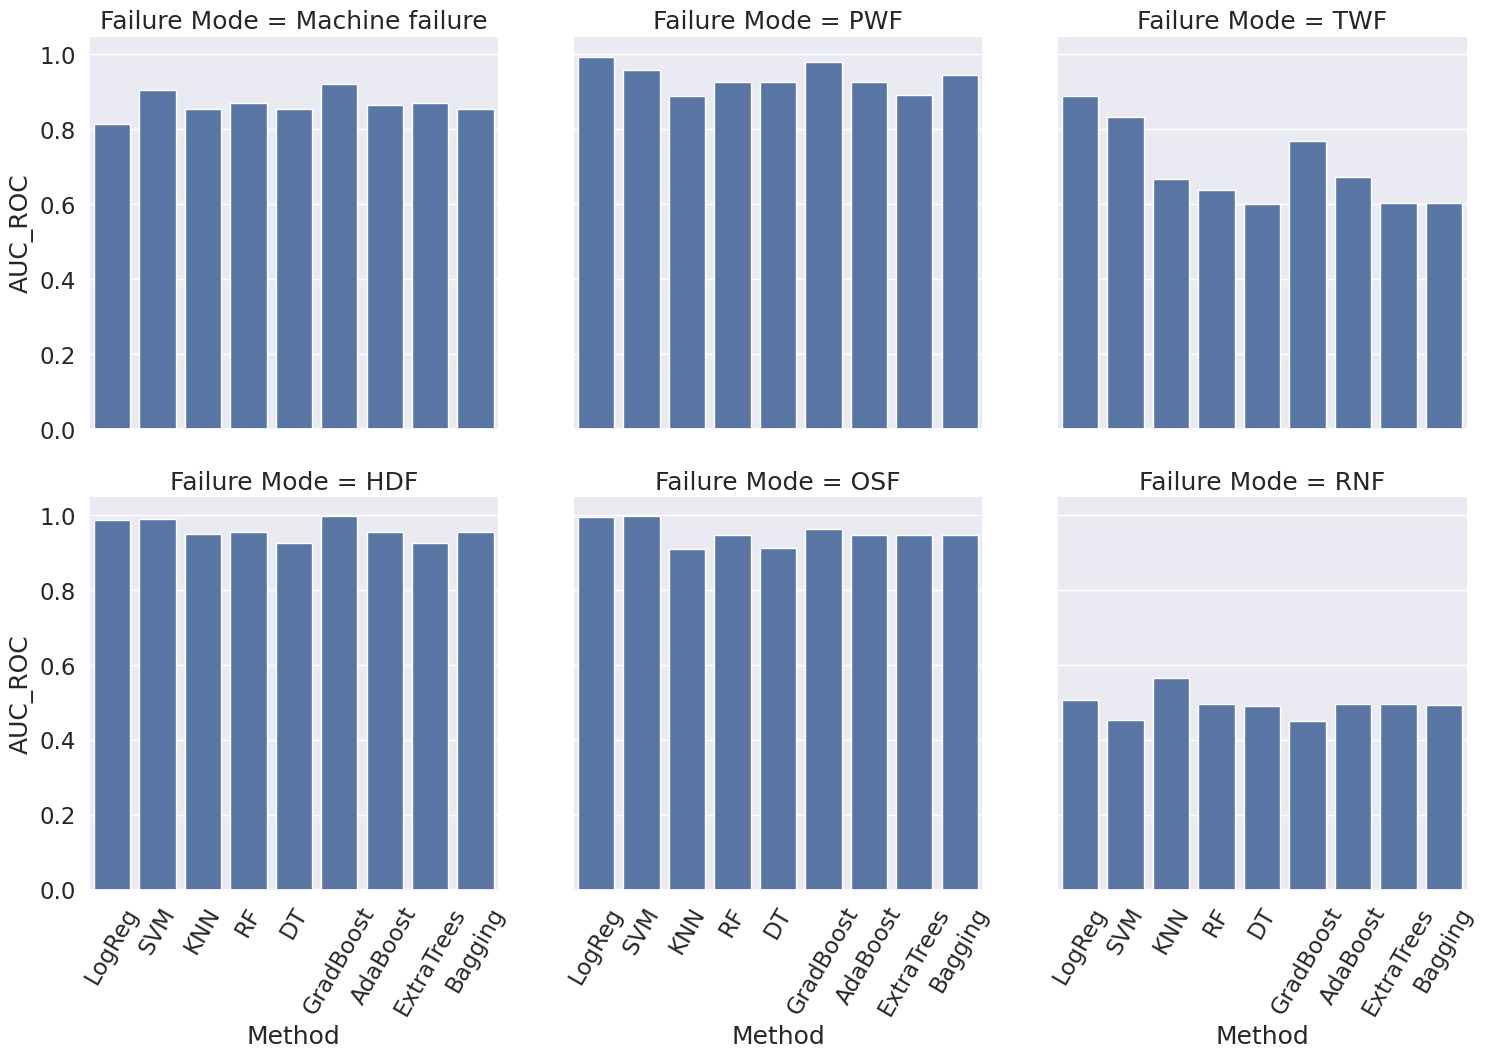

In [ ]:
sns.set(font_scale=1.5)
g = sns.catplot(x='Method', col= 'Failure Mode', y='AUC_ROC', kind='bar', data=results, col_wrap=3)
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]

In [ ]:
def GetImportance(data, usr_fails=None):
  fails = public_failure_modes
  feature_names_short = ['Air \n Temp','Proc.\n Temp\n','Rot. \n Spd.','Torque','Tool\n Wear']
  if usr_fails is not None: fails = {key: fails[key] for key in usr_fails}
  results_list = []
  for fail in fails:
    scores = public_models['RF'](*WrangleData(data, fails[fail]),importances='True')
    idx = 0
    for score in scores:
      #results_list.append([fail, data.columns.values[idx], score])
      results_list.append([fail, feature_names_short[idx], score])
      idx += 1
  results_df = pd.DataFrame(results_list, columns=['Failure Mode','Feature','Importance'])
  return results_df

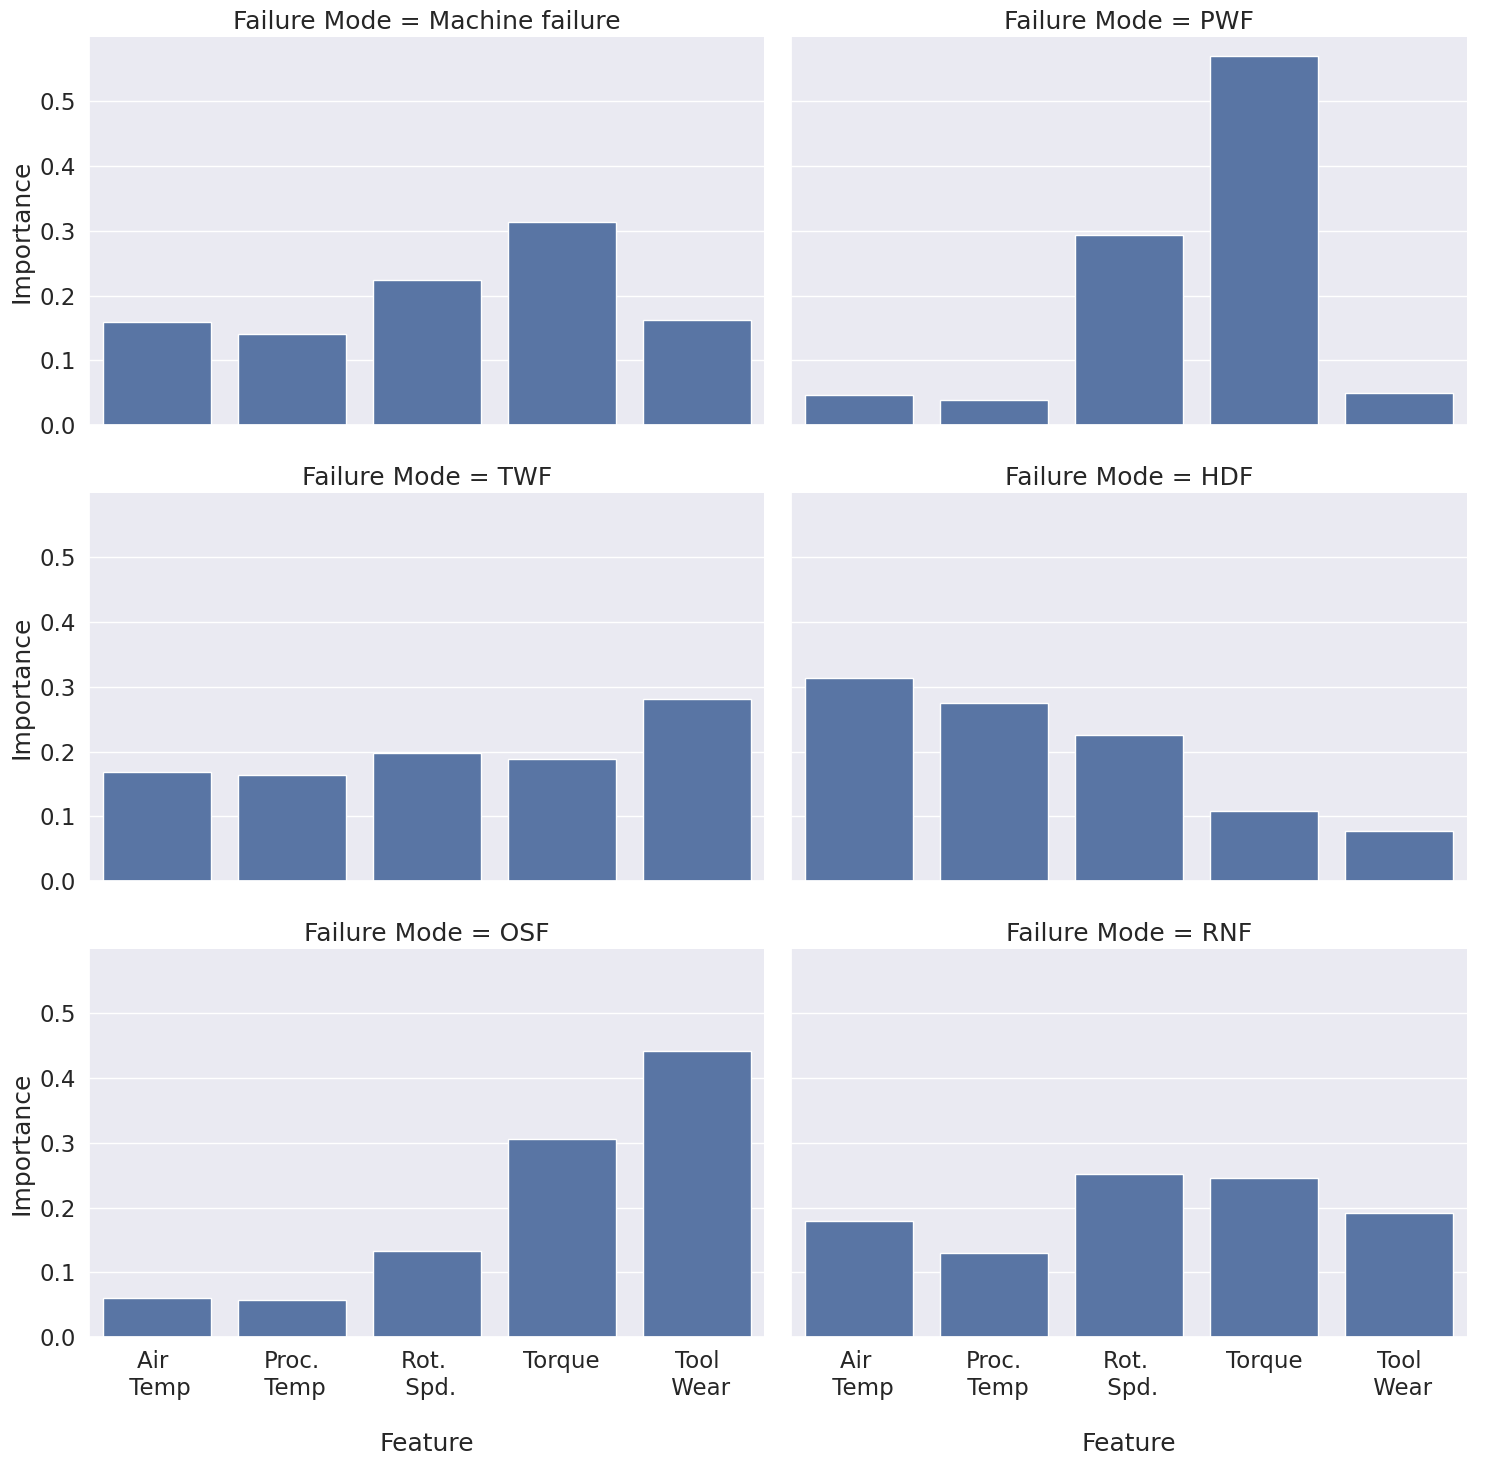

In [ ]:
sns.set(font_scale=1.5)
g = sns.catplot(x='Feature', col= 'Failure Mode', y='Importance', kind='bar', data=GetImportance(X), col_wrap=2)